In [1]:
import sys
import importlib
sys.path.append(r'../../pykneer')
sys.path.append(r'../pykneer')
import pykneer_io as io
importlib.reload(io)
import preprocessing_for_nb as prep
importlib.reload(prep)
import segmentation_sa_for_nb as segm
importlib.reload(segm)

import SimpleITK as sitk
import matplotlib.pyplot as plt

from preparing_images import prepare_image_and_list

In [17]:
# process list
# first in TP as reference
caselist = [
    {'pid': '9189303','TP':[0,1,2,3,4,5,6,8,10],'TP2':[0,12,18,24,30,36,48,72,96],'side':'L'},
    {'pid': '9189303','TP':[0,1,2,3,4,5,6,8,10],'TP2':[0,12,18,24,30,36,48,72,96],'side':'R'},
    {'pid': '9939718','TP':[0,1,2,3,4,5,6,8,10],'TP2':[0,12,18,24,30,36,48,72,96],'side':'L'},
    {'pid': '9939718','TP':[0,1,2,3,4,5,6,8,10],'TP2':[0,12,18,24,30,36,48,72,96],'side':'R'},
    {'pid': '9941231','TP':[0,1,2,3,4,5,6,8,10],'TP2':[0,12,18,24,30,36,48,72,96],'side':'L'},
    {'pid': '9941231','TP':[0,1,2,3,4,5,6,8,10],'TP2':[0,12,18,24,30,36,48,72,96],'side':'R'},
    {'pid': '9942724','TP':[0,1,2,3,4,5,6,8,10],'TP2':[0,12,18,24,30,36,48,72,96],'side':'L'},
    {'pid': '9942724','TP':[0,1,2,3,4,5,6,8,10],'TP2':[0,12,18,24,30,36,48,72,96],'side':'R'},
#     {'pid': '9941446','TP':[0,1,2,3,4,5,6,8,10],'TP2':[0,12,18,24,30,36,48,72,96],'side':'L'},
#     {'pid': '9941446','TP':[0,1,2,3,4,5,6,8,10],'TP2':[0,12,18,24,30,36,48,72,96],'side':'R'},
#     {'pid': '9404954','TP':[0,1,2,3,4,5,6,8,10],'TP2':[0,12,18,24,30,36,48,72,96],'side':'L'},
#     {'pid': '9404954','TP':[0,1,2,3,4,5,6,8,10],'TP2':[0,12,18,24,30,36,48,72,96],'side':'R'},
#     {'pid': '9942030','TP':[0,1,2,3,4,5,6,8,10],'TP2':[0,12,18,24,30,36,48,72,96],'side':'L'},
#     {'pid': '9942030','TP':[0,1,2,3,4,5,6,8,10],'TP2':[0,12,18,24,30,36,48,72,96],'side':'R'},
]

prepare_image_and_list(caselist)

ahaknee0tp29  exist
dcm path for TPid 0 Z:/OAI Baseline/ge0/9189303/10397606
Loading QVJ Y:/0tp29\cascade/0/9189303/10397606L\E10397606L_L.QVJ
Adding QVS E10397606LS101_L.QVS
ahaknee12tp29  exist
dcm path for TPid 1 Z:/OAI 12 Months/2.C.2/9189303/20060522/11151205
Loading QVJ Y:/12tp29\cascade/12/9189303/20060522L\E20060522L_L.QVJ
Adding QVS E20060522LS101_L.QVS
ahaknee18tp29  exist
cannot find dcm path for TPid 2
ahaknee24tp29  exist
cannot find dcm path for TPid 3
ahaknee30tp29  exist
cannot find dcm path for TPid 4
ahaknee36tp29  exist
cannot find dcm path for TPid 5
ahaknee48tp29  exist
cannot find dcm path for TPid 6
ahaknee72tp29  exist
cannot find dcm path for TPid 8
ahaknee96tp29  exist
cannot find dcm path for TPid 10
ahaknee0tp29  exist
dcm path for TPid 0 Z:/OAI Baseline/ge0/9189303/10397613
Loading QVJ Y:/0tp29\cascade/0/9189303/10397613R\E10397613R_R.QVJ
Adding QVS E10397613RS101_R.QVS
coronal Z:/OAI Baseline/ge0/9189303/10397613/001.dcm
copying Z:/OAI Baseline/ge0/9189303

Loading QVJ Y:/36tp29\cascade/36/9941231/20070713L\E20070713L_L.QVJ
Adding QVS E20070713LS101_L.QVS
ahaknee48tp29  exist
dcm path for TPid 6 Z:/OAI 48 Months/6.C.1/9941231/20080724/12444708
Loading QVJ Y:/48tp29\cascade/48/9941231/20080724L\E20080724L_L.QVJ
Adding QVS E20080724LS101_L.QVS
ahaknee72tp29  exist
dcm path for TPid 8 Z:/OAI 72 Months/8.C.1/9941231/20100809/11021805
Loading QVJ Y:/72tp29\cascade/72/9941231/20100809L\E20100809L_L.QVJ
Adding QVS E20100809LS101_L.QVS
ahaknee96tp29  exist
dcm path for TPid 10 Z:/OAI 96 Months/10.C.1/9941231/20120830/13486205
Loading QVJ Y:/96tp29\cascade/96/9941231/20120830L\E20120830L_L.QVJ
Adding QVS E20120830LS101_L.QVS
ahaknee0tp29  exist
dcm path for TPid 0 Z:/OAI Baseline/gc0/9941231/10118912
Loading QVJ Y:/0tp29\cascade/0/9941231/10118912R\E10118912R_R.QVJ
Adding QVS E10118912RS101_R.QVS
ahaknee12tp29  exist
dcm path for TPid 1 Z:/OAI 12 Months/1.C.2/9941231/20051012/10199011
Loading QVJ Y:/12tp29\cascade/12/9941231/20051012R\E20051012R_R

In [18]:
def preprocess():
    input_file_name           = ".\image_list_preprocessing.txt"
    n_of_cores                = 1 # change the number of cores according to your computer
    intensity_standardization = 0

    # Image information
    image_data = io.load_image_data_preprocessing(input_file_name)

    ref = sitk.ReadImage('../../reference/newsubject/reference.mha')

    # Spatial standardization
    # Step 0: Read the dicom images
    prep.read_dicom_stack(image_data, n_of_cores)
    # Save image header
    prep.print_dicom_header(image_data, n_of_cores)    # save to *.txt

    # Step 1: Change orientation to RAI
    #prep.axial_to_sagittal(image_data, n_of_cores)
    prep.orientation_to_rai(image_data, n_of_cores)

    # Step 2: Change laterality if knee is right
    prep.flip_rl(image_data, n_of_cores)
    # Step 3: Set image origin to (0,0,0)
    prep.origin_to_zero(image_data, n_of_cores)    # Images are saved as *_orig.mha and they are anonymized

    # 4. Correct magnetic field inhomogeneities
    # Magnetic fields inhomogeneities create grey shades on images. This correction removes these shades. 
    # This is the longest step of the processing. It can take up to 15-20 min on a standard PC or laptop
    if intensity_standardization == 1:
        prep.field_correction(image_data, n_of_cores)
        prep.rescale_to_range(image_data, n_of_cores)  # 5. Rescale intensities to [0 100]
        prep.edge_preserving_smoothing(image_data, n_of_cores)  # 6. Edge preserving smoothing

preprocess()

9189303L_TP0
9189303L_TP1
9189303R_TP0
9189303R_TP1
9189303R_TP3
9189303R_TP5
9189303R_TP6
9189303R_TP8
9939718L_TP0
9939718L_TP1
9939718L_TP3
9939718L_TP5
9939718L_TP6
9939718L_TP8
9939718L_TP10
9939718R_TP0
9939718R_TP1
9939718R_TP2
9939718R_TP3
9939718R_TP5
9939718R_TP6
9939718R_TP8
9939718R_TP10
9941231L_TP0
9941231L_TP1
9941231L_TP3
9941231L_TP5
9941231L_TP6
9941231L_TP8
9941231L_TP10
9941231R_TP0
9941231R_TP1
9941231R_TP3
9941231R_TP5
9941231R_TP6
9942724L_TP0
9942724L_TP1
9942724L_TP3
9942724L_TP6
9942724L_TP10
9942724R_TP0
9942724R_TP1
9942724R_TP3
9942724R_TP5
9942724R_TP6
9942724R_TP10
-> information loaded for 46 subjects
-> Dicom images read
-> The total time was 62.54 seconds (about 1 min)
-> Dicom headers written
-> The total time was 10.09 seconds (about 0 min)
-> Image orientation changed
-> The total time was 12.54 seconds (about 0 min)
-> Image laterality changed for right images
-> The total time was 5.12 seconds (about 0 min)
-> Image origin changed
-> _orig.mha ima

In [19]:
def segmentation_sa():
    input_file_name = "./image_list_newsubject.txt"
    modality        = "newsubject" # use "newsubject", "longitudinal", or "multimodal" 
    n_of_cores      = 1

    image_data = io.load_image_data_segmentation(modality, input_file_name)
    segm.prepare_reference(image_data)
    ### NOTE!!! reference_fv is dummy!!!

    # Segment Bone
    # 1. Register image to reference
    segm.register_bone_to_reference(image_data, n_of_cores)
    # 2. Invert transformations
    segm.invert_bone_transformations(image_data, n_of_cores)
    # 3. Warp reference mask to moving image
    segm.warp_bone_mask(image_data, n_of_cores)
    
    segm.register_tibia_to_reference(image_data, n_of_cores)
    segm.invert_tibia_transformations(image_data, n_of_cores)
    segm.warp_tibia_mask(image_data, n_of_cores)

    # Segment cartilage
    segm.register_cartilage_to_reference(image_data, n_of_cores)
    segm.invert_cartilage_transformations(image_data, n_of_cores)
    segm.warp_cartilage_mask(image_data, n_of_cores)
    
# segmentation_sa()

In [20]:
sys.path.append("../../..")
from MyProcessDicom import *
input_file_name = "./image_list_newsubject.txt"
modality        = "newsubject" # use "newsubject", "longitudinal", or "multimodal" 
n_of_cores      = 1

image_data = io.load_image_data_segmentation(modality, input_file_name)
image_data[0]

-> image information loaded


{'registration_type': 'newsubject',
 'vessel': 'fv',
 'cartilage': 'fc',
 'bone': 'f',
 'current_anatomy': [],
 'reference_folder': 'C:\\Zhixuan\\OAI-registration\\pyKNEEr-yg\\reference\\newsubject\\',
 'reference_name': 'reference.mha',
 'reference_root': 'reference',
 'moving_folder': 'C:\\Zhixuan\\OAI-registration\\pyKNEEr-yg\\preprocessed\\',
 'moving_name': '9189303L_TP0_prep.mha',
 'moving_root': '9189303L_TP0_prep',
 'registered_folder': 'C:\\Zhixuan\\OAI-registration\\pyKNEEr-yg\\registered\\',
 'segmented_folder': 'C:\\Zhixuan\\OAI-registration\\pyKNEEr-yg\\segmented\\',
 'registered_sub_folder': 'C:\\Zhixuan\\OAI-registration\\pyKNEEr-yg\\registered\\9189303L_TP0_prep\\',
 'i_registered_sub_folder': 'C:\\Zhixuan\\OAI-registration\\pyKNEEr-yg\\registered\\9189303L_TP0_prep\\invert\\',
 'dilate_radius': 15,
 'fmask_file_name': 'reference_f.mha',
 'fdil_mask_file_name': 'reference_f_15.mha',
 'flevelset_mask_file_name': 'reference_f_levelSet.mha',
 'fcmask_file_name': 'reference

In [21]:
def segmentation_sa_long():
    input_file_name = "./image_list_longitudinal.txt"
    modality        = "longitudinal" # use "newsubject", "longitudinal", or "multimodal" 
    n_of_cores      = 1

    image_data = io.load_image_data_segmentation(modality, input_file_name)
    segm.prepare_reference(image_data)

    segm.register_bone_to_reference(image_data, n_of_cores)
    segm.invert_bone_transformations(image_data, n_of_cores)
    segm.warp_tibia_mask(image_data, n_of_cores)
    segm.warp_bone_mask(image_data, n_of_cores)

    # segm.register_vessel_to_reference(image_data, n_of_cores)
    # segm.invert_vessel_transformations(image_data, n_of_cores)
    # segm.warp_vessel_mask(image_data, n_of_cores)
    
#     segm.register_cartilage_to_reference(image_data, n_of_cores)
#     segm.invert_cartilage_transformations(image_data, n_of_cores)
#     segm.warp_cartilage_mask(image_data, n_of_cores)
    
# segmentation_sa_long()

In [22]:
# preprocess()
segmentation_sa()
segmentation_sa_long()

-> image information loaded
reference.mha
-> Reference preparation completed
-> Registration completed
-> The total time was 686.69 seconds (about 11 min)
-> Inversion completed
-> The total time was 735.08 seconds (about 12 min)
-> Warping completed
-> The total time was 154.69 seconds (about 2 min)
-> Registration completed
-> The total time was 671.05 seconds (about 11 min)
-> Inversion completed
-> The total time was 723.72 seconds (about 12 min)
-> Warping completed
-> The total time was 153.54 seconds (about 2 min)
-> Registration completed
-> The total time was 467.22 seconds (about 7 min)
-> Inversion completed
-> The total time was 600.06 seconds (about 10 min)
-> Warping completed
-> The total time was 155.36 seconds (about 2 min)
-> image information loaded
9189303L_TP0_prep.mha
9189303R_TP0_prep.mha
9189303R_TP0_prep.mha
9189303R_TP0_prep.mha
9189303R_TP0_prep.mha
9189303R_TP0_prep.mha
9939718L_TP0_prep.mha
9939718L_TP0_prep.mha
9939718L_TP0_prep.mha
9939718L_TP0_prep.mha
9

In [65]:
image_data[0]

{'registration_type': 'longitudinal',
 'vessel': 'fv',
 'cartilage': 'fc',
 'bone': 'f',
 'current_anatomy': [],
 'reference_folder': 'C:\\Zhixuan\\OAI-registration\\pyKNEEr-yg\\reference\\longitudinal\\',
 'reference_name': '9941446L_TP0_prep.mha',
 'reference_root': '9941446L_TP0_prep',
 'moving_folder': 'C:\\Zhixuan\\OAI-registration\\pyKNEEr-yg\\preprocessed\\',
 'moving_name': '9941446L_TP1_prep.mha',
 'moving_root': '9941446L_TP1_prep',
 'registered_folder': 'C:\\Zhixuan\\OAI-registration\\pyKNEEr-yg\\registered\\',
 'segmented_folder': 'C:\\Zhixuan\\OAI-registration\\pyKNEEr-yg\\segmented\\',
 'registered_sub_folder': 'C:\\Zhixuan\\OAI-registration\\pyKNEEr-yg\\registered\\9941446L_TP1_prep\\',
 'i_registered_sub_folder': 'C:\\Zhixuan\\OAI-registration\\pyKNEEr-yg\\registered\\9941446L_TP1_prep\\invert\\',
 'dilate_radius': 15,
 'fmask_file_name': '9941446L_TP0_prep_f.mha',
 'fdil_mask_file_name': '9941446L_TP0_prep_f_15.mha',
 'flevelset_mask_file_name': '9941446L_TP0_prep_f_le

In [60]:
show_slice_images(image_data)

9941231L


interactive(children=(IntSlider(value=34, description='image_z', max=69), FloatSlider(value=0.5, description='…

In [56]:
show_slice_images(image_data)

9941231L


interactive(children=(IntSlider(value=34, description='image_z', max=69), FloatSlider(value=0.5, description='…

In [23]:
sys.path.append("../../..")
from MyProcessDicom import *
input_file_name = "./image_list_longitudinal.txt"
modality        = "longitudinal" # use "newsubject", "longitudinal", or "multimodal" 
n_of_cores      = 1

image_data = io.load_image_data_segmentation(modality, input_file_name)

-> image information loaded


In [4]:
import matplotlib.pyplot as plt
import os
%matplotlib inline
import numpy as np
from ipywidgets import interact, fixed
def show_sagittal_images(image, length, index, tp_str):
    
    image_npa = sitk.GetArrayViewFromImage(image)
    size = np.size(image_npa, 2)
    # Draw the fixed image in the first subplot.
    plt.subplot(length,1,index)
    plt.imshow(image_npa[:,:,size//2],cmap=plt.cm.Greys_r);
    plt.title(tp_str)
    plt.axis('off')

In [5]:
def show_slice_images(all_image_data):
    last_name = '0000000L'
    # for each image
    for i in range(0, len(all_image_data)):

        # get paths and file names of the current image
        image_data                    = all_image_data[i]
#         if image_data['moving_name'][:12] != last_name:
#             last_name = image_data['moving_name'][:8]
        print(image_data['moving_name'][:12])
            
        moving_file_name              = image_data['registered_sub_folder']    + image_data['fspline_name']
        reference_file_name              = image_data['reference_folder']    + image_data['reference_name']
    #     image_data = all_image_data[0]
    #     reference_file_name = image_data['registered_sub_folder']    + image_data['frigid_name']
    #         mask_file_name                = image_data["segmented_folder"] + image_data[anatomy + "mask"]

    #     test_name          = image_data["reference_folder"] + image_data["reference_name"]
        # read the images
        reference = sitk.ReadImage(reference_file_name)
        moving = sitk.ReadImage(moving_file_name)
    #         mask   = sitk.ReadImage(mask_file_name)
    #     test = sitk.ReadImage(test_name)

    #     reference = tmp_resample(reference, moving)
    #     print(moving.GetSize())

        # images from simpleitk to numpy
    #     reference_py = sitk.GetArrayFromImage(reference)
    #     moving_py = sitk.GetArrayFromImage(moving)
    #         mask_py   = sitk.GetArrayFromImage(mask)
        show_mixed_images(reference, moving)
    #     show_mixed_images(reference, reference)

In [11]:
show_slice_images(image_data)

9941446L


interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

9941446R


interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

9404954L


interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

9404954R


interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

9939718R


interactive(children=(IntSlider(value=29, description='image_z', max=59), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=29, description='image_z', max=59), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=29, description='image_z', max=59), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=29, description='image_z', max=59), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=29, description='image_z', max=59), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=29, description='image_z', max=59), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=29, description='image_z', max=59), FloatSlider(value=0.5, description='…

9941231L


interactive(children=(IntSlider(value=34, description='image_z', max=68), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=34, description='image_z', max=68), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=34, description='image_z', max=68), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=34, description='image_z', max=68), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=34, description='image_z', max=68), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=34, description='image_z', max=68), FloatSlider(value=0.5, description='…

9941231R


interactive(children=(IntSlider(value=36, description='image_z', max=73), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=36, description='image_z', max=73), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=36, description='image_z', max=73), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=36, description='image_z', max=73), FloatSlider(value=0.5, description='…

9942030L


interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

9942030R


interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=37, description='image_z', max=74), FloatSlider(value=0.5, description='…

9942724L


interactive(children=(IntSlider(value=29, description='image_z', max=59), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=29, description='image_z', max=59), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=29, description='image_z', max=59), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=29, description='image_z', max=59), FloatSlider(value=0.5, description='…

9942724R


interactive(children=(IntSlider(value=29, description='image_z', max=59), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=29, description='image_z', max=59), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=29, description='image_z', max=59), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=29, description='image_z', max=59), FloatSlider(value=0.5, description='…

interactive(children=(IntSlider(value=29, description='image_z', max=59), FloatSlider(value=0.5, description='…

In [ ]:
# 57 cases in total
# 9941231L TP5, 9941231R TP10 bone registered but vessel not
# 9941231L TP10, 9942724L TP10, 9942724R TP10 fail


In [6]:
def display_images_with_mask(image_z, fixed, moving):
    # img = (1.0 - alpha)*fixed[:,:,image_z] + alpha*moving[:,:,image_z]
    fixed = sitk.GetArrayFromImage(fixed)
    moving = sitk.GetArrayFromImage(moving) # mask
    dst = fixed[image_z,:,:]*0.5+moving[image_z,:,:]*0.5*255
#     plt.figure(figsize=(15,15))
    plt.imshow(dst, cmap=plt.cm.Greys_r)
    # plt.imshow(sitk.GetArrayViewFromImage(img),cmap=plt.cm.Greys_r);
    plt.axis('off')
    plt.show()

def show_masked_images(image, mask):
    interact(display_images_with_mask, image_z=(0,image.GetSize()[2] - 1), 
             fixed = fixed(image), moving=fixed(mask));

In [7]:
def display_images_with_mask_sagittal(image_z, fixed, moving):
    # img = (1.0 - alpha)*fixed[:,:,image_z] + alpha*moving[:,:,image_z]
    fixed = sitk.GetArrayFromImage(fixed)
    moving = sitk.GetArrayFromImage(moving) # mask
    dst = fixed[:,:,image_z]*0.5+moving[:,:,image_z]*0.5*255
    plt.figure(figsize=(7,7))
    plt.imshow(dst, cmap=plt.cm.Greys_r)
    # plt.imshow(sitk.GetArrayViewFromImage(img),cmap=plt.cm.Greys_r);
    plt.axis('off')
    plt.show()

def show_masked_images_sagittal(image, mask):
    interact(display_images_with_mask_sagittal, image_z=(0,image.GetSize()[0] - 1), 
             fixed = fixed(image), moving=fixed(mask));
    
def display_images_with_all_masks(image_z, alpha, fixed, moving, tibia):
    # img = (1.0 - alpha)*fixed[:,:,image_z] + alpha*moving[:,:,image_z]
    fixed = sitk.GetArrayFromImage(fixed)
    moving = sitk.GetArrayFromImage(moving) # mask
    tibia = sitk.GetArrayFromImage(tibia) # mask
    dst = fixed[:,:,image_z]*alpha+moving[:,:,image_z]*(1-alpha)*255+tibia[:,:,image_z]*(1-alpha)*255
    dst = np.flipud(dst)
    plt.figure(figsize=(7,7))
    plt.imshow(dst, cmap=plt.cm.Greys_r)
    # plt.imshow(sitk.GetArrayViewFromImage(img),cmap=plt.cm.Greys_r);
    plt.axis('off')
    plt.show()

def show_all_masked_images(image, mask, tibia):
    interact(display_images_with_all_masks, image_z=(0,image.GetSize()[0] - 1), alpha=(0.0,1.0,0.05),
             fixed = fixed(image), moving=fixed(mask), tibia=fixed(tibia));

In [102]:
# mask_file_name = image_data[0]['reference_folder'] + '9941231L_TP0_prep_f.mha'
mask_file_name = image_data[0]['segmented_folder'] + '9404954L_TP0_prep_f.mha'
tibia_file_name = image_data[0]['segmented_folder'] + '9404954L_TP0_prep_t.mha'
# mask_file_name = 'C:\\Zhixuan\\OAI-registration\\pykneer-yg\\reference\\longitudinal\\9941446L_TP0_prep_t.mha'
moving_file_name   = image_data[0]['moving_folder']    + "9404954L_TP0_prep.mha"
mask = sitk.ReadImage(mask_file_name)
tibia = sitk.ReadImage(tibia_file_name)
moving = sitk.ReadImage(moving_file_name)
key = 1
if key == 1:
    mask = resample_bwimage(mask)
    tibia = resample_bwimage(tibia)
    moving = resample_bwimage(moving)
#     show_masked_images_sagittal(moving, mask)
    show_all_masked_images(moving, mask,tibia)
else:
    show_masked_images(moving, mask)    

[384 384  75] [384, 384, 309]
[384 384  75] [384, 384, 309]
[384 384  75] [384, 384, 309]


interactive(children=(IntSlider(value=191, description='image_z', max=383), Output()), _dom_classes=('widget-i…

In [13]:
def show_sagital_slice_images(all_image_data, is_rigid=False):
    last_name = '0000000L'
    # for each image
    for i in range(0, len(all_image_data)):
#     for i in range(0, 4):

        # get paths and file names of the current image
        image_data                    = all_image_data[i]
#         if image_data['moving_name'][:8] != last_name:
#             last_name = image_data['moving_name'][:8]
        print(image_data['moving_name'][:12])       
   
        # mask_file_name = image_data[0]['reference_folder'] + '9941231L_TP0_prep_f.mha'
        if is_rigid:
            mask_file_name = image_data['segmented_folder'] + image_data['fmask'][:-5] + 'f_rigid.mha'
            tibia_file_name = image_data['segmented_folder'] + image_data['fmask'][:-5] + 't_rigid.mha'
        else:
            mask_file_name = image_data['segmented_folder'] + image_data['fmask']
            tibia_file_name = image_data['segmented_folder'] + image_data['fmask'][:-5] + 't.mha'
        # mask_file_name = 'C:\\Zhixuan\\OAI-registration\\pykneer-yg\\reference\\longitudinal\\9941446L_TP0_prep_t.mha'
        moving_file_name   = image_data['moving_folder']    + image_data['moving_name']
        mask = sitk.ReadImage(mask_file_name)
        tibia = sitk.ReadImage(tibia_file_name)
        moving = sitk.ReadImage(moving_file_name)
        key = 1
        if key == 1:
            mask = resample_bwimage(mask)
            tibia = resample_bwimage(tibia)
            moving = resample_bwimage(moving)
        #     show_masked_images_sagittal(moving, mask)
            show_all_masked_images(moving, mask,tibia)
        else:
            show_masked_images(moving, mask)    

In [12]:
show_sagital_slice_images(image_data)

9941446L_TP0


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941446R_TP0


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9404954L_TP0


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9404954R_TP0


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

In [9]:
show_sagital_slice_images(image_data)

9941446L_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941446L_TP3


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941446L_TP6


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941446L_TP8


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941446L_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941446R_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941446R_TP3


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941446R_TP5


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941446R_TP6


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941446R_TP8


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941446R_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9404954L_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9404954L_TP3


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9404954L_TP6


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9404954L_TP8


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9404954L_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9404954R_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9404954R_TP3


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9404954R_TP4


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9404954R_TP5


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9404954R_TP6


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9404954R_TP8


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9404954R_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9942030L_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9942030L_TP3


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9942030L_TP5


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9942030L_TP6


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9942030R_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9942030R_TP3


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9942030R_TP5


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9942030R_TP6


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

In [16]:
# rigid_only
show_sagital_slice_images(image_data, is_rigid=True)

9941446L_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941446L_TP3


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941446L_TP6


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941446L_TP8


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941446L_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941446R_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941446R_TP3


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941446R_TP5


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941446R_TP6


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941446R_TP8


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941446R_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9404954L_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9404954L_TP3


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9404954L_TP6


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9404954L_TP8


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9404954L_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9404954R_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9404954R_TP3


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9404954R_TP4


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9404954R_TP5


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9404954R_TP6


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9404954R_TP8


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9404954R_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9942030L_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9942030L_TP3


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9942030L_TP5


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9942030L_TP6


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9942030R_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9942030R_TP3


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9942030R_TP5


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9942030R_TP6


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

In [ ]:
# 9404954L TP3, 6, 8, 10

In [25]:
show_sagital_slice_images(image_data, is_rigid = True)

9189303L_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9189303R_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9189303R_TP3


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9189303R_TP5


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9189303R_TP6


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9189303R_TP8


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9939718L_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9939718L_TP3


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9939718L_TP5


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9939718L_TP6


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9939718L_TP8


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9939718L_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9939718R_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9939718R_TP2


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9939718R_TP3


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9939718R_TP5


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9939718R_TP6


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9939718R_TP8


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9939718R_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941231L_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941231L_TP3


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941231L_TP5


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941231L_TP6


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941231L_TP8


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941231L_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941231R_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941231R_TP3


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941231R_TP5


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9941231R_TP6


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9942724L_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9942724L_TP3


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9942724L_TP6


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9942724L_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9942724R_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9942724R_TP3


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9942724R_TP5


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9942724R_TP6


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

9942724R_TP1


interactive(children=(IntSlider(value=191, description='image_z', max=383), FloatSlider(value=0.5, description…

In [ ]:
# 9939718L_TP10 9941231L_TP10 9942724L_TP10 9942724R_TP10

In [ ]:
#9941231R_TP5, 9941231R_TP6, 9941231L_TP1, 9939718R_TP3, 5, 6

In [50]:
def tmp_resample(fixed_image, reference):
    isoresample = sitk.ResampleImageFilter()
    isoresample.SetInterpolator(sitk.sitkBSpline)
    isoresample.SetOutputDirection(fixed_image.GetDirection())
    isoresample.SetOutputOrigin(fixed_image.GetOrigin())
    orig_spacing = fixed_image.GetSpacing()
    new_spacing = (orig_spacing[0],orig_spacing[0],orig_spacing[0])
    isoresample.SetOutputSpacing(new_spacing)
    orig_size = np.array(fixed_image.GetSize(), dtype=np.int)    
    new_size = orig_size.copy()
    new_size[2] = int(orig_size[2]*(orig_spacing[2]/orig_spacing[0])+0.5)
    new_size = [int(s) for s in new_size]
    print(orig_size, new_size)
    isoresample.SetSize(new_size)
    return isoresample.Execute(fixed_image)

In [29]:
def show_registered_images(find_str): 
    path = 'C:\\Zhixuan\\OAI-registration\\pyKNEEr-yg\\registered\\'
    file_path_list = []
    reference = sitk.ReadImage(path+find_str+"_TP0_prep\\f_rigid.mha")
    for file in os.listdir(path):
        if find_str in file:
            file_path_list.append(file)
    i = 1
    # Create a figure with two subplots and the specified size.
    plt.subplots(len(file_path_list), 1,figsize=(25,20))
    for tmp_path in file_path_list:
        result_file_name              = path + tmp_path + '\\f_rigid.mha'
#         mask_file_name                = image_data["segmented_folder"] + image_data[anatomy + "mask"]

        # read the images
        result = sitk.ReadImage(result_file_name)
#         mask   = sitk.ReadImage(mask_file_name)

        # images from simpleitk to numpy
    #     result_py = sitk.GetArrayFromImage(result)
    #         mask_py   = sitk.GetArrayFromImage(mask)
        pos1 = tmp_path.find('TP', 0)
        pos2 = tmp_path.find('_', pos1)
        tp = tmp_path[pos1:pos2]
        if tp != 'TP0':
            result = resample_image(result)
        
            
        show_sagittal_images(result, len(file_path_list), i, tp)
        i = i + 1
    plt.show() 

# show_registered_images('9939718R')

In [30]:
def display_sagittal_images(fixed_image, moving_image):
    # Create a figure with two subplots and the specified size.
    plt.subplots(1,2,figsize=(10,8))
    
    fixed_npa = sitk.GetArrayViewFromImage(fixed_image)
    moving_npa = sitk.GetArrayViewFromImage(moving_image)
    size = np.size(fixed_npa, 2)
    # Draw the fixed image in the first subplot.
    plt.subplot(1,2,1)
    plt.imshow(fixed_npa[:,:,size//2],cmap=plt.cm.Greys_r);
    plt.title('fixed image')
    plt.axis('off')
    
    # Draw the moving image in the second subplot.
    plt.subplot(1,2,2)
    plt.imshow(moving_npa[:,:,size//2],cmap=plt.cm.Greys_r);
    plt.title('moving image')
    plt.axis('off')
    
    plt.show() 

[384 384  69] [384, 384, 284]
[384 384  69] [384, 384, 284]
[384 384  69] [384, 384, 284]
[384 384  69] [384, 384, 284]
[384 384  69] [384, 384, 284]
[384 384  69] [384, 384, 284]


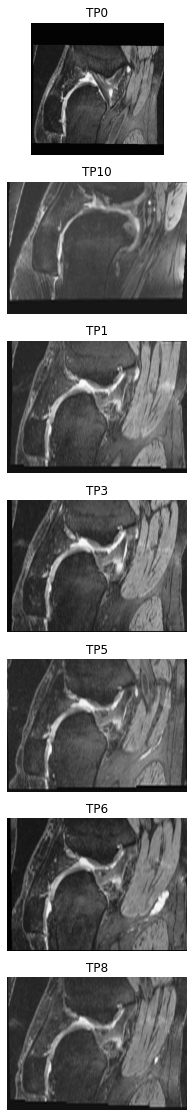

In [62]:
show_registered_images('9941231L')

[384 384  70] [384, 384, 288]
[384 384  69] [384, 384, 284]
[384 384  69] [384, 384, 284]
[384 384  69] [384, 384, 284]
[384 384  69] [384, 384, 284]
[384 384  69] [384, 384, 284]


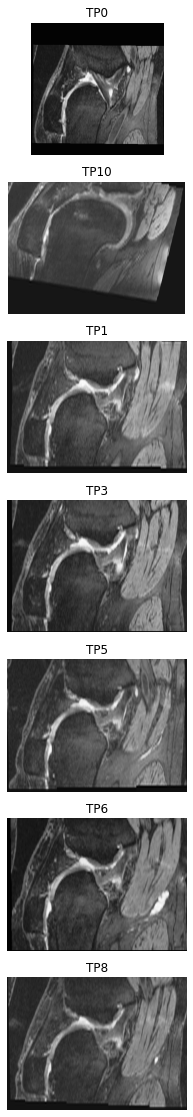

In [33]:
show_registered_images('9941231L')